# 学号 3220221151 姓名 甄烨炜
## 数据集 movies_dataset

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
import pandas as pd
import numpy as np
from scipy import stats
from math import isnan
import math

In [2]:
path = 'D:/archive/'
data = pd.read_csv(path+'movies_dataset.csv',index_col=0)
#data.head()#默认展示前五行数据
"""
id: movie's unique id
title: movie's name
storyline: a short description of the movie
views: no. of clicks per movie
downloads: no. of downloads per movie
IMDb-rating: rating
appropriate_for: R-rated, PG-13, etc
language: this can be multiple languages also
industry: Hollywood, Bollywood, etc.
posted_date: when the movie is posted on the platform
release_date: when the movie is released worldwide
runtime: in minutes
director: director's name
writer: list of all the writers
"""

In [3]:
#查看属性类型
data.dtypes

IMDb-rating        float64
appropriate_for     object
director            object
downloads           object
id                   int64
industry            object
language            object
posted_date         object
release_date        object
run_time            object
storyline           object
title               object
views               object
writer              object
dtype: object

# 数据摘要

In [4]:
# 对每个标称属性列进行频次统计
for column in data.select_dtypes(include=['object']).columns:
    print(f"Column: {column}")
    print(pd.value_counts(data[column]))
    print("\n")

Column: appropriate_for
R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64


Column: director
Venky Atluri                                  405
Simone Stock                                  403
Xavier Manrique                               403
John Swab                                     205
Neil Jordan                                   205
                                             ... 
Agnieszka Smoczynska                            1
Dylan Thomas Ellis                              1
Sunil Thakur, Sunil Dhawan, Shivani Th

In [5]:
#数值属性，给出5数概括及缺失值的个数
for column in data.select_dtypes(include=['number']).columns:
    print(f"Column:{column}")
    print(data[column].describe())
    print(f"缺失值个数:{data[column].isna().sum()}")
    print("\n")

Column:IMDb-rating
count    19707.000000
mean         5.762151
std          1.374041
min          1.100000
25%          4.800000
50%          5.700000
75%          6.600000
max          9.900000
Name: IMDb-rating, dtype: float64
缺失值个数:841


Column:id
count     20548.000000
mean     222351.199776
std      138422.327931
min           1.000000
25%       96122.250000
50%      264457.500000
75%      354561.250000
max      372092.000000
Name: id, dtype: float64
缺失值个数:0




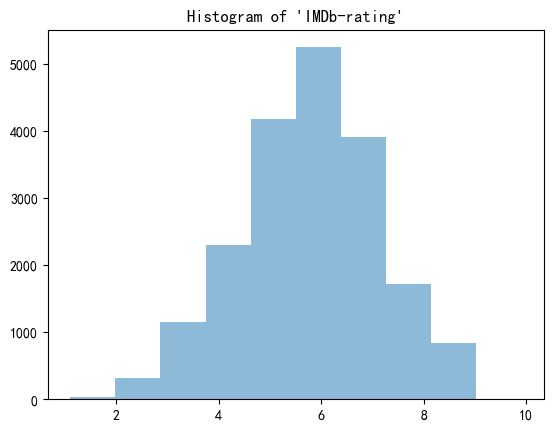

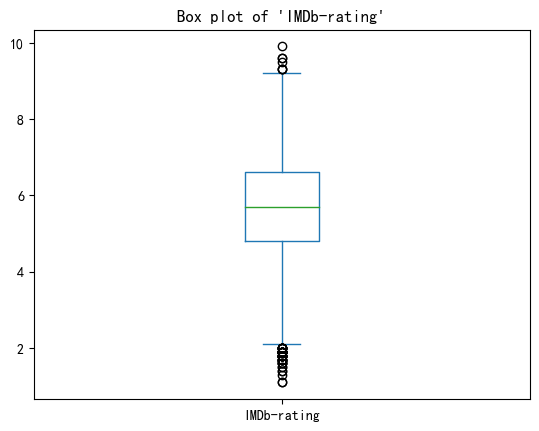

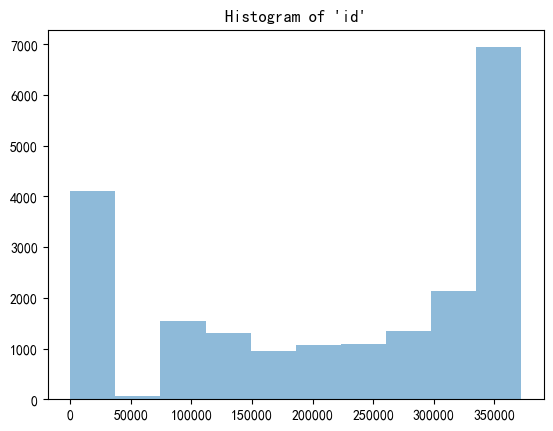

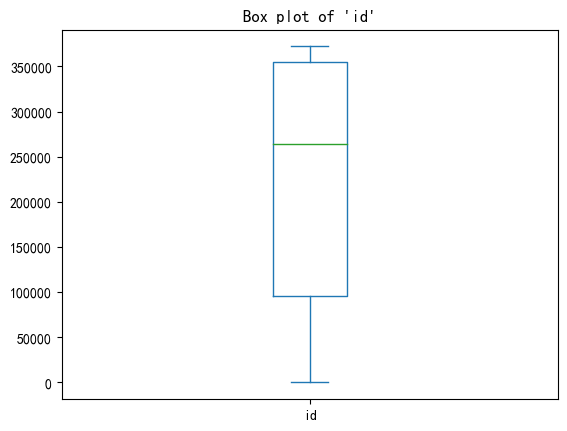

In [6]:
# 数据可视化
## 使用直方图、盒图等检查数据分布及离群点
# 绘制数值属性列的直方图和盒图
for column in data.select_dtypes(include='number'):
    # 绘制直方图
    plt.hist(data[column], alpha=0.5)
    plt.title(f"Histogram of '{column}'")
    plt.show()
    
    # 绘制盒图
    data[column].plot.box()
    plt.title(f"Box plot of '{column}'")
    plt.show()

可以看出IMDb_rating近似正态分布，且有很多离群点，而id不符合正态分布，没有离群点。

# 数据缺失的处理

In [7]:
#缺失数据的列
# 检查每一列是否包含缺失值
has_missing = data.isnull().any()

# 返回所有包含缺失值的列名列表
cols_with_missing = data.columns[has_missing].tolist()

print("Columns with missing values:")
print(cols_with_missing)

Columns with missing values:
['IMDb-rating', 'appropriate_for', 'director', 'downloads', 'industry', 'language', 'posted_date', 'release_date', 'run_time', 'storyline', 'title', 'views', 'writer']


可以看出除id外其他属性均有缺失值。缺失原因可能是数据源本身未完全记录对应的属性值或无法获取。其中缺失的数值属性为IMDb-rating。

In [8]:
#剔除缺失部分
del_null_data = data.copy(deep=True)
del_null_data = del_null_data.dropna(subset=['IMDb-rating'])

Original five number summary:
count    19707.000000
mean         5.762151
std          1.374041
min          1.100000
25%          4.800000
50%          5.700000
75%          6.600000
max          9.900000
Name: IMDb-rating, dtype: float64

Modified five number summary:
count    19707.000000
mean         5.762151
std          1.374041
min          1.100000
25%          4.800000
50%          5.700000
75%          6.600000
max          9.900000
Name: IMDb-rating, dtype: float64


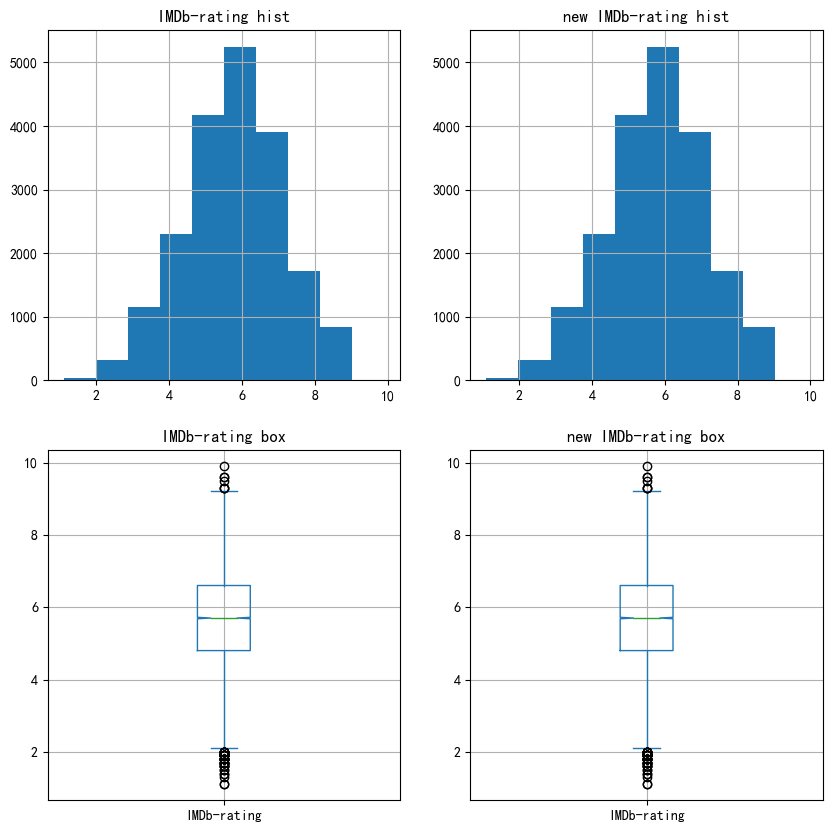

In [9]:
# 输出修改前后 IMDb_rating 列的五值描述
print("Original five number summary:")
print(data['IMDb-rating'].describe())

print("\nModified five number summary:")
print(del_null_data['IMDb-rating'].describe())
# IMDb-rating 可视化对比新旧数据
plt.figure(figsize = (10,10))
#直方图
plt.subplot(2,2,1)
plt.title("IMDb-rating hist")
data['IMDb-rating'].hist() 
#直方图
plt.subplot(2,2,2)
plt.title("new IMDb-rating hist")
del_null_data['IMDb-rating'].hist() 

#盒图
plt.subplot(2,2,3)
plt.title("IMDb-rating box")
data['IMDb-rating'].plot(kind='box',notch=True,grid=True)
#盒图
plt.subplot(2,2,4)
plt.title("new IMDb-rating box")
del_null_data['IMDb-rating'].plot(kind='box',notch=True,grid=True)

plt.show()

可以看出将缺失值剔除的方法剔除前后五值描述、盒图和直线图都不变。

Original five number summary:
count    19707.000000
mean         5.762151
std          1.374041
min          1.100000
25%          4.800000
50%          5.700000
75%          6.600000
max          9.900000
Name: IMDb-rating, dtype: float64

Modified five number summary:
count    20548.000000
mean         5.796442
std          1.355827
min          1.100000
25%          4.900000
50%          5.800000
75%          6.600000
max          9.900000
Name: IMDb-rating, dtype: float64


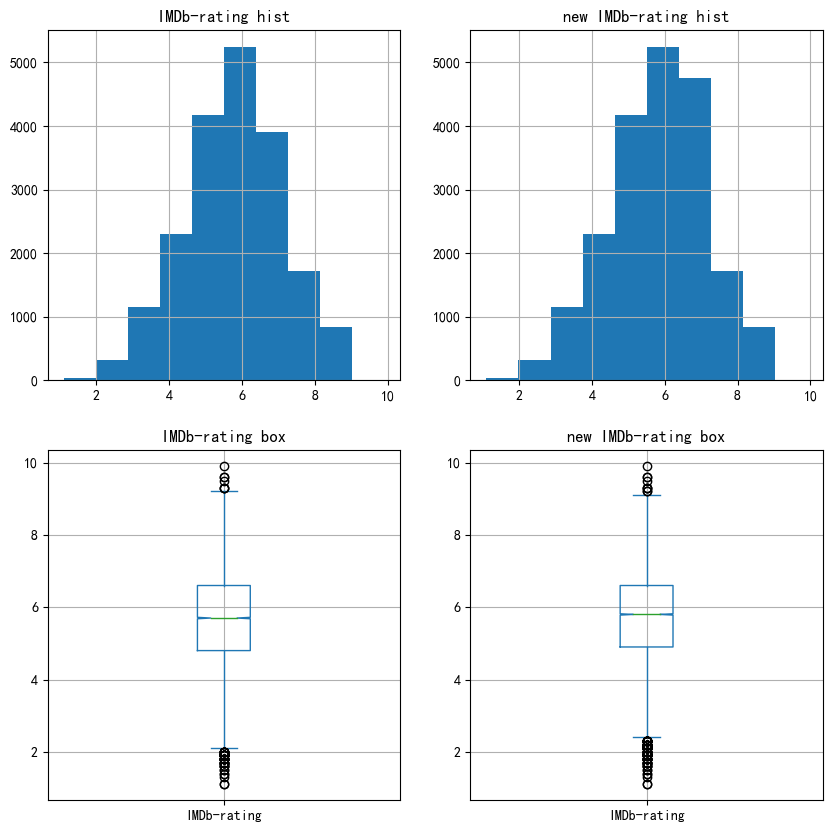

In [10]:
#用最高频率值来填补缺失值
fill_data_with_most_frequency = data.copy(deep=True)
#对'IMDb-rating'进行最高频率值填补缺失值
mode_value = fill_data_with_most_frequency['IMDb-rating'].mode()[0]
# 将 IMDb_rating 列的缺失值填充为最高频率值
fill_data_with_most_frequency['IMDb-rating'].fillna(mode_value, inplace=True)
# 输出修改前后 IMDb_rating 列的五值描述
print("Original five number summary:")
print(data['IMDb-rating'].describe())

print("\nModified five number summary:")
print(fill_data_with_most_frequency['IMDb-rating'].describe())
# IMDb-rating 可视化对比新旧数据
plt.figure(figsize = (10,10))
#直方图
plt.subplot(2,2,1)
plt.title("IMDb-rating hist")
data['IMDb-rating'].hist() 
#直方图
plt.subplot(2,2,2)
plt.title("new IMDb-rating hist")
fill_data_with_most_frequency['IMDb-rating'].hist() 

#盒图
plt.subplot(2,2,3)
plt.title("IMDb-rating box")
data['IMDb-rating'].plot(kind='box',notch=True,grid=True)
#盒图
plt.subplot(2,2,4)
plt.title("new IMDb-rating box")
fill_data_with_most_frequency['IMDb-rating'].plot(kind='box',notch=True,grid=True)

plt.show()

可以看出最高频率值填充前后数据方差变小，变得更加集中。均值和25%、50%分数都有一定程度变大。

In [11]:
#通过属性的相关关系来填补缺失值
data.corr()

C:\Users\A\AppData\Local\Temp\ipykernel_7936\1376163567.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,IMDb-rating,id
IMDb-rating,1.000000,0.048087
id,0.048087,1.000000


C:\Users\A\AppData\Local\Temp\ipykernel_7936\3803809488.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['IMDb-rating'] = lr.predict(test[['id']])


填充前 IMDb-rating 五值描述统计量：
count    19707.000000
mean         5.762151
std          1.374041
min          1.100000
25%          4.800000
50%          5.700000
75%          6.600000
max          9.900000
Name: IMDb-rating, dtype: float64

填充后 IMDb-rating 五值描述统计量：
count    20548.000000
mean         5.762741
std          1.345717
min          1.100000
25%          4.900000
50%          5.752569
75%          6.600000
max          9.900000
Name: IMDb-rating, dtype: float64


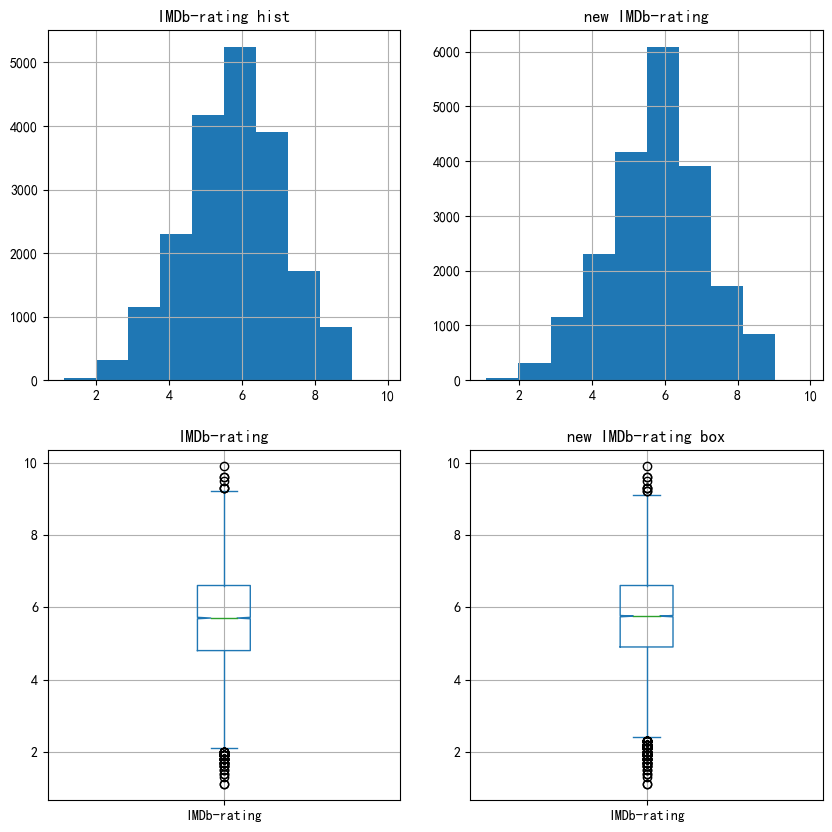

In [12]:
# 深拷贝 data
data_corr =data.copy(deep=True)

# 训练集：IMDb-rating和id非缺失值的部分
train = data_corr.loc[(~data_corr['IMDb-rating'].isna()) & (~data_corr['id'].isna())]

# 测试集：IMDb-rating为缺失值的部分
test = data_corr.loc[data_corr['IMDb-rating'].isna()]

# 线性回归填充缺失值
from sklearn.linear_model import LinearRegression

# 构建线性回归模型
lr = LinearRegression()
lr.fit(train[['id']], train['IMDb-rating'])

# 预测 IMDb-rating 缺失值
test['IMDb-rating'] = lr.predict(test[['id']])

# 合并训练集和填充后的测试集
data_corr = pd.concat([train, test])
# 对比五值描述统计量
print("填充前 IMDb-rating 五值描述统计量：")
print(data['IMDb-rating'].describe())
print("\n填充后 IMDb-rating 五值描述统计量：")
print(data_corr['IMDb-rating'].describe())

# IMDb-rating 可视化对比新旧数据
plt.figure(figsize = (10,10))
#直方图
plt.subplot(2,2,1)
plt.title("IMDb-rating hist")
data['IMDb-rating'].hist() 
#直方图
plt.subplot(2,2,2)
plt.title("new IMDb-rating")
data_corr['IMDb-rating'].hist() 

#盒图
plt.subplot(2,2,3)
plt.title("IMDb-rating")
data['IMDb-rating'].plot(kind='box',notch=True,grid=True)
#盒图
plt.subplot(2,2,4)
plt.title("new IMDb-rating box")
data_corr['IMDb-rating'].plot(kind='box',notch=True,grid=True)

plt.show()

通过属性相关性填充，IMDb-rating和id相关性弱，所以填充后方差变大。但缺失比例低所以分布情况未产生较大变化。

In [13]:
#通过数据对象之间的相似性来填补缺失值
#除缺失列和id列其他列均为标称属性，id号一般不能用于表示相似性，所以这里采用剩余的属性即所有标称属性

# 找出不含缺失值的行
data_object_corr =data.copy(deep=True)
complete_data = data_object_corr.dropna(subset=['IMDb-rating'])
nominal_cols=data_object_corr.select_dtypes(include=['object']).columns
# 计算每行与当前行的相同属性个数，具有相同属性最多的行视为最相似对象
def get_same_attr_count(row):
    count = 0
    closest_row = complete_data.iloc[0] # 假设第一行就是最接近的行
    for _, complete_row in complete_data.iterrows():
        if row.name != complete_row.name:
            same_attr_count = sum(complete_row[nominal_cols] == row[nominal_cols])
            if same_attr_count > count:
                count = same_attr_count
                closest_row = complete_row
    return closest_row['IMDb-rating']

# 用相同属性最多的行的 IMDb Rating 值填充缺失值
for _, row in data.iterrows():
    if pd.isnull(row['IMDb-rating']):
        data_object_corr.loc[row.name, 'IMDb-rating'] = get_same_attr_count(row)

填充前 IMDb-rating 五值描述统计量：
count    19707.000000
mean         5.762151
std          1.374041
min          1.100000
25%          4.800000
50%          5.700000
75%          6.600000
max          9.900000
Name: IMDb-rating, dtype: float64

填充后 IMDb-rating 五值描述统计量：
count    20548.000000
mean         5.769802
std          1.365459
min          1.100000
25%          4.900000
50%          5.700000
75%          6.600000
max          9.900000
Name: IMDb-rating, dtype: float64


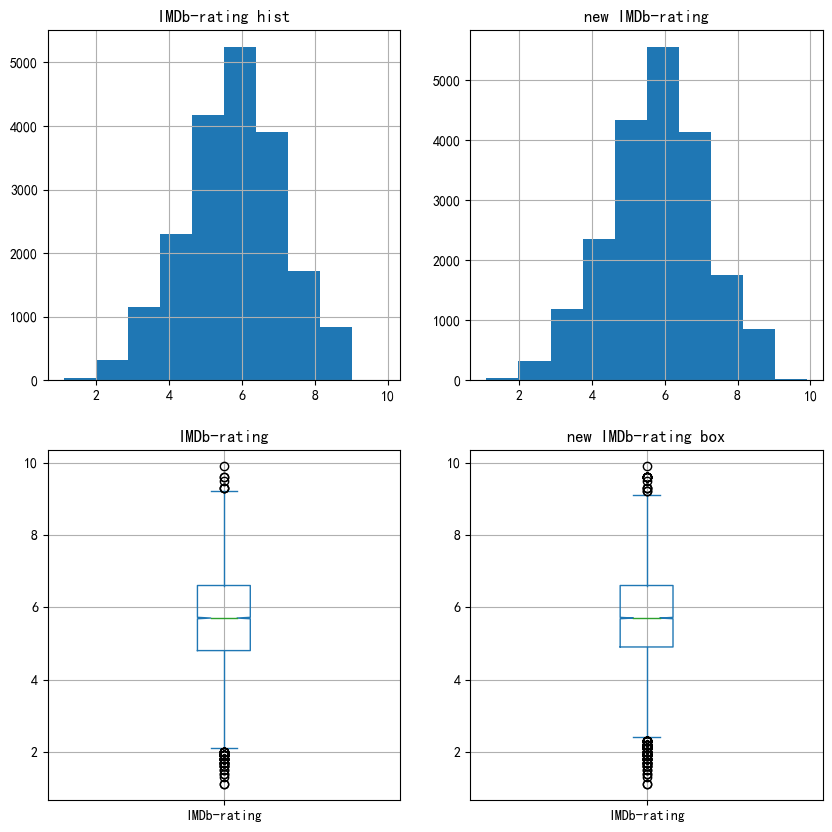

In [14]:
# 对比五值描述统计量
print("填充前 IMDb-rating 五值描述统计量：")
print(data['IMDb-rating'].describe())
print("\n填充后 IMDb-rating 五值描述统计量：")
print(data_object_corr['IMDb-rating'].describe())

# IMDb-rating 可视化对比新旧数据
plt.figure(figsize = (10,10))
#直方图
plt.subplot(2,2,1)
plt.title("IMDb-rating hist")
data['IMDb-rating'].hist() 
#直方图
plt.subplot(2,2,2)
plt.title("new IMDb-rating")
data_object_corr['IMDb-rating'].hist() 

#盒图
plt.subplot(2,2,3)
plt.title("IMDb-rating")
data['IMDb-rating'].plot(kind='box',notch=True,grid=True)
#盒图
plt.subplot(2,2,4)
plt.title("new IMDb-rating box")
data_object_corr['IMDb-rating'].plot(kind='box',notch=True,grid=True)

plt.show()

该方法耗时较长,填充后方差变小，数据分布更加集中。